In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
cpi=pd.read_csv("inflation-of-consumer-prices.csv")
cpi.head()

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Australia,AUS,1960,3.728814
1,Austria,AUT,1960,1.945749
2,Belgium,BEL,1960,0.299467
3,Bolivia,BOL,1960,11.533153
4,Burkina Faso,BFA,1960,7.788162


           infl      years
23     1.779878 1960-01-01
89     1.695213 1961-01-01
157    3.632215 1962-01-01
227    2.946161 1963-01-01
297   13.355261 1964-01-01
...         ...        ...
8736   6.623437 2020-01-01
8925   5.131407 2021-01-01
9114   6.699034 2022-01-01
9302   5.649143 2023-01-01
9485   4.953035 2024-01-01

[65 rows x 2 columns]


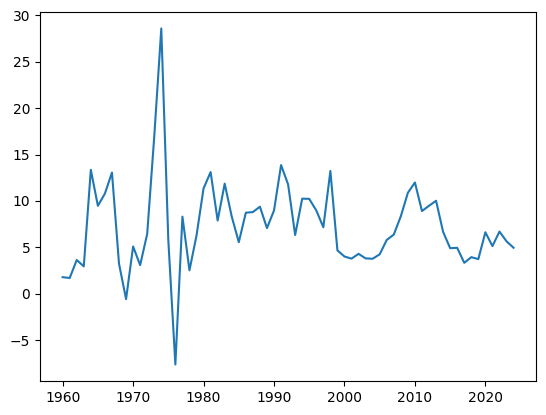

In [5]:
country="India"
data=cpi[cpi["Entity"]==country].sort_values("Year")
cp=data['Inflation, consumer prices (annual %)']
years = pd.to_datetime(data["Year"], format="%Y")
cp.head()
cp.tail()
plt.plot(years, cp)
values=pd.DataFrame({"infl":cp,"years":years})
print(values)



In [6]:
print(cp.columns.tolist())

AttributeError: 'Series' object has no attribute 'columns'

In [7]:
d=cp
result = adfuller(cp)
print(f"ADF statistic = {result[0]:.3f}, p-value = {result[1]:}")

ADF statistic = -5.305, p-value = 5.343157742930871e-06


<function plot_pacf at 0x000001EBCEB4E980>
-------------


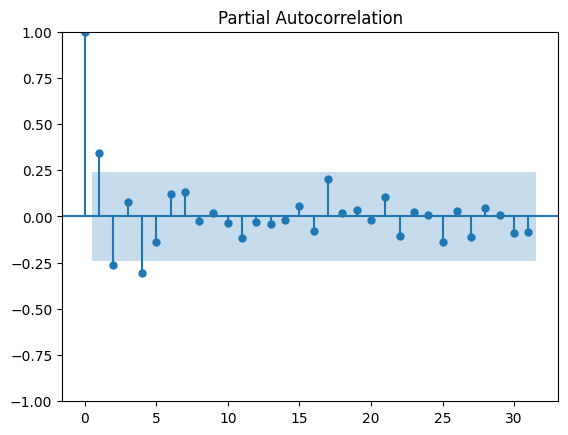

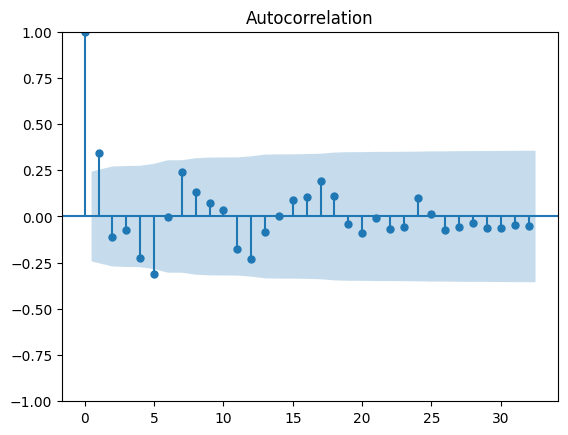

In [ ]:
plot_pacf(cp.dropna(),lags=31)
plot_acf(cp,lags=32)
print(plot_pacf)
print("-------------")
plt.show(plot_acf)

In [ ]:
n = len(cp)
train_end = int(n * 0.8)
train = cp.iloc[:train_end]
test = cp.iloc[train_end:]

In [ ]:
p = 1
model = AutoReg(train, lags=p, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                                      AutoReg Model Results                                      
Dep. Variable:     Inflation, consumer prices (annual %)   No. Observations:                   52
Model:                                        AutoReg(1)   Log Likelihood                -153.288
Method:                                  Conditional MLE   S.D. of innovations              4.888
Date:                                   Sat, 20 Sep 2025   AIC                            312.576
Time:                                           22:18:35   BIC                            318.371
Sample:                                                1   HQIC                           314.790
                                                      52                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [ ]:
pred_train = model_fit.predict(start=train.index[p], end=train.index[-1], dynamic=False)
pred_test = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

print(pred_test)

7148    7.844726
7149    7.844726
7150    7.844726
7151    7.844726
7152    7.844726
          ...   
9481    7.844726
9482    7.844726
9483    7.844726
9484    7.844726
9485    7.844726
Length: 2338, dtype: float64


Linear regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = "inflation-of-consumer-prices.csv"
df = pd.read_csv(file_path)

# Filter for India
india = df[df["Entity"] == "India"].sort_values("Year").reset_index(drop=True)

# Extract series
series = india["Inflation, consumer prices (annual %)"].dropna().values

window_size = 3
step = window_size

rows = []
actuals = []
preds = []

# Prepare training dataset
X, y = [], []
for i in range(len(series) - window_size):
    X.append(series[i:i+window_size])
    y.append(series[i+window_size])
X = np.array(X)
y = np.array(y)

# Train model
model = LinearRegression()
model.fit(X, y)

# Rolling predictions in block format
inputs = series[:window_size]

for i in range(window_size, len(series), step):
    pred = model.predict([inputs])[0]
    actual = series[i] if i < len(series) else np.nan
    
    rows.append({
        "Input Window": np.round(inputs, 3),
        "Actual Inflation": round(actual, 3) if not np.isnan(actual) else None,
        "Predicted Inflation": round(pred, 3)
    })
    
    if not np.isnan(actual):
        actuals.append(actual)
        preds.append(pred)
    
    # Update inputs: predicted + next block of actuals
    if i+window_size <= len(series):
        inputs = np.array([pred] + list(series[i:i+window_size-1]))

# Convert to DataFrame
final_df = pd.DataFrame(rows)

# Limit to exactly len(series)//4 rows (~16 for India)
#

# Show result
print(final_df)


                Input Window  Actual Inflation  Predicted Inflation
0       [1.78, 1.695, 3.632]             2.946                7.151
1     [7.151, 2.946, 13.355]            10.802               11.401
2   [11.401, 10.802, 13.062]            -0.584                9.249
3     [9.249, -0.584, 5.092]             6.442                9.034
4     [9.034, 6.442, 16.941]             5.748               12.053
5    [12.053, 5.748, -7.634]             2.523                1.839
6      [1.839, 2.523, 6.276]            13.113                8.054
7     [8.054, 13.113, 7.891]             8.319                6.062
8      [6.062, 8.319, 5.556]             8.801                6.331
9      [6.331, 8.801, 9.383]             8.971                7.867
10     [7.867, 8.971, 13.87]             6.327                9.877
11    [9.877, 6.327, 10.248]             8.977                9.251
12     [9.251, 8.977, 7.164]             4.670                7.074
13      [7.074, 4.67, 4.009]             4.297  

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE manually
mse = mean_squared_error(actuals, preds)
rmse = np.sqrt(mse)

print(f"✅ RMSE of block predictions: {rmse:.3f}")


✅ RMSE of block predictions: 3.426


In [14]:
# Predict next 5 years inflation using rolling forecast
future_steps = 5
future_preds = []

# Start with the last 4 known values
inputs = series[-window_size:].copy()

for _ in range(future_steps):
    pred = model.predict([inputs])[0]
    future_preds.append(round(pred, 3))
    
    # Update window: drop oldest, append new prediction
    inputs = np.append(inputs[1:], pred)

# Create a DataFrame for clarity
last_year = india["Year"].max()
future_years = [last_year + i for i in range(1, future_steps + 1)]

future_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Inflation": future_preds
})

print(future_df)


   Year  Predicted Inflation
0  2025                7.749
1  2026                8.580
2  2027                8.014
3  2028                8.207
4  2029                7.829


autoregression

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "inflation-of-consumer-prices.csv"
df = pd.read_csv(file_path)

# Filter for India
india = df[df["Entity"] == "India"].sort_values("Year").reset_index(drop=True)

# Extract series
series = india["Inflation, consumer prices (annual %)"].dropna().values

# Train AutoReg model (lag = 4 to match your window size)
window_size = 4
model = AutoReg(series, lags=window_size)
model_fit = model.fit()

# Rolling predictions in block format (every 4th step)
rows = []
actuals, preds = [], []

for i in range(window_size, len(series), window_size):
    # Training window (last 4 values before prediction point)
    training_window = series[i-window_size:i]
    
    # Predicted and actual
    pred = model_fit.predict(start=i, end=i)[0]
    actual = series[i] if i < len(series) else np.nan
    
    rows.append({
        "Training Window": np.round(training_window, 3),
        "Actual Inflation": round(actual, 3) if not np.isnan(actual) else None,
        "Predicted Inflation": round(pred, 3)
    })
    
    if not np.isnan(actual):
        actuals.append(actual)
        preds.append(pred)

# Build DataFrame (16 rows for India)
final_df = pd.DataFrame(rows).head(len(series)//window_size)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(actuals, preds))

# Show result
print(final_df.to_string(index=False))
print(f"\n✅ RMSE of AutoReg block predictions: {rmse:.3f}")


                Training Window  Actual Inflation  Predicted Inflation
    [1.78, 1.695, 3.632, 2.946]            13.355                7.680
[13.355, 9.475, 10.802, 13.062]             3.237                7.338
   [3.237, -0.584, 5.092, 3.08]             6.442                6.250
 [6.442, 16.941, 28.599, 5.748]            -7.634                0.594
  [-7.634, 8.307, 2.523, 6.276]            11.346               13.825
[11.346, 13.113, 7.891, 11.868]             8.319                9.319
    [8.319, 5.556, 8.73, 8.801]             9.383                7.024
   [9.383, 7.074, 8.971, 13.87]            11.788                9.164
[11.788, 6.327, 10.248, 10.225]             8.977                6.142
   [8.977, 7.164, 13.231, 4.67]             4.009                3.507
   [4.009, 3.779, 4.297, 3.806]             3.767                7.534
   [3.767, 4.246, 5.797, 6.373]             8.349                8.246
 [8.349, 10.882, 11.989, 8.912]             9.479                6.834
  [9.4

In [17]:
# Forecast the next 5 years using the fitted AutoReg model
future_steps = 5

# Get the last year from dataset
last_year = india["Year"].max()

# Predict next 5 values
future_preds = model_fit.predict(start=len(series), end=len(series)+future_steps-1)

# Build DataFrame
future_years = [last_year + i for i in range(1, future_steps+1)]
future_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Inflation": np.round(future_preds, 3)
})

print("✅ Next 5 years inflation forecast (AutoReg):")
print(future_df.to_string(index=False))


✅ Next 5 years inflation forecast (AutoReg):
 Year  Predicted Inflation
 2025                7.749
 2026                8.580
 2027                8.014
 2028                8.207
 2029                7.829


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "inflation-of-consumer-prices.csv"
df = pd.read_csv(file_path)

# Filter for India
india = df[df["Entity"] == "India"].sort_values("Year").reset_index(drop=True)

# Extract series
series = india["Inflation, consumer prices (annual %)"].dropna().values
years = india["Year"].values

# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(series) * 0.7)
train, test = series[:train_size], series[train_size:]

print(f"Training samples: {len(train)}, Testing samples: {len(test)}")

# Train AutoReg model on training set (lag = 4)
lag = 4
model = AutoReg(train, lags=lag)
model_fit = model.fit()

print("✅ Model trained successfully")


Training samples: 45, Testing samples: 20
✅ Model trained successfully


In [2]:
# Predict for the test range
start = len(train)
end = len(train) + len(test) - 1

preds = model_fit.predict(start=start, end=end, dynamic=False)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, preds))

# Build DataFrame with actual vs predicted
test_years = years[train_size:]
results_df = pd.DataFrame({
    "Year": test_years,
    "Actual Inflation": np.round(test, 3),
    "Predicted Inflation": np.round(preds, 3)
})

print(results_df)
print(f"\n✅ Test RMSE: {rmse:.3f}")


    Year  Actual Inflation  Predicted Inflation
0   2005             4.246                9.619
1   2006             5.797               11.422
2   2007             6.373                9.489
3   2008             8.349                8.831
4   2009            10.882                7.568
5   2010            11.989                6.475
6   2011             8.912                7.315
7   2012             9.479                8.186
8   2013            10.018                8.413
9   2014             6.666                8.618
10  2015             4.907                8.394
11  2016             4.948                7.925
12  2017             3.328                7.810
13  2018             3.939                7.880
14  2019             3.730                7.974
15  2020             6.623                8.135
16  2021             5.131                8.200
17  2022             6.699                8.135
18  2023             5.649                8.069
19  2024             4.953              

In [3]:
# Forecast next 5 years beyond the dataset
future_steps = 5
last_year = india["Year"].max()

future_preds = model_fit.predict(start=len(series), end=len(series)+future_steps-1)
future_years = [last_year + i for i in range(1, future_steps+1)]

future_df = pd.DataFrame({
    "Year": future_years,
    "Predicted Inflation": np.round(future_preds, 3)
})

print("✅ Next 5 years inflation forecast (AutoReg):")
print(future_df.to_string(index=False))


✅ Next 5 years inflation forecast (AutoReg):
 Year  Predicted Inflation
 2025                8.008
 2026                8.036
 2027                8.073
 2028                8.087
 2029                8.085
